<a href="https://colab.research.google.com/github/dhairyachandra/KDM_Project_-RateMyProfessors/blob/main/Instructor_Rating_vs_Word_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/RateMyProfessor_Sample data.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


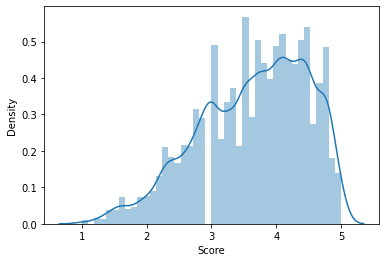

In [ ]:
# Helpful visual - Score distribution for instructors 
# Get an idea of how we should define our binary categories
import seaborn as sns

sns.distplot(df['Score'])

In [ ]:
# Convert Score values from string to float for analysis

df['Score'] = df['Score'].astype(float)

In [ ]:
# Creating binary catagories for comparision
# One binary category will be the x-axis, the other the y-axis
# In this case, Scores will be converting into either 'High Rating' or 'Low Rating'

df['Score'] = df['Score'].apply(lambda x: 'High Rating' if x > 4 else 'Low Rating')

In [ ]:
!pip install scattertext

     |████████████████████████████████| 7.3MB 11.0MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9299 sha256=f7a538ccb09a5476e7147407afea52332b2917c118e9c835bc78039de0ab318f
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext


In [ ]:
# NLP processing

import spacy
import scattertext

In [ ]:
nlp = spacy.load('en')

In [ ]:
# Stop words to ignore from NLTK
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stopWords = set(stopwords.words('english'))
nlp.Defaults.stop_words |= stopWords

# Includes a text file to add custom stop words
with open('stopwords.txt', 'r') as f:
    str_f = f.read()
    stopwords_file = set(str_f.split('\n'))
nlp.Defaults.stop_words |= stopwords_file

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Defines corpus. Removes stop words
# category_col : the column in our datafile holding our binary categories.
# text_col : the column in our datafile holding our text to be analyzed 

corpus = (scattertext.CorpusFromPandas(df,
                                       category_col='Score', 
                                       text_col='comment',
                                       nlp=nlp).build().remove_terms(nlp.Defaults.stop_words, ignore_absences=True))

In [ ]:
# Using Scattertext to visualize term associations 
# category_name : label the y-axis of html visual
# not_category_name : label for the x-axis of html visual

corpus_dataframe = df
html = scattertext.produce_scattertext_explorer(corpus,
                                                category='Low Rating',
                                               category_name='Low Rating',
                                               not_category_name='High Rating',
                                               width_in_pixels=1000,
                                               height_in_pixels=700,
                                               metadata=corpus_dataframe['professor_name'])

In [ ]:
# Saves html to file
html_file_name = "Instructor-Rating-Vs-Word-Frequency.html"
open(html_file_name, 'wb').write(html.encode('utf-8'))